In [2]:
# Perform PCA, classify w/ log regression+ovr, figure decision boundaries
# Jan Nagler (adapted)
# applied to wine database
# Basically this imports all needed packages
import pandas as pd
from sklearn.datasets import make_blobs
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr 
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import sympy as sympy
import numpy as np
from scipy import *
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from icecream import ic

In [3]:
 #Creates blobs in 4 categories
 
 X, y = make_blobs(n_samples=1000, centers=4, n_features=10, random_state=0)

In [4]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0)

# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# Fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# Normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

In [5]:
cov_mat = np.cov(X_train_std.T) #cov matrix from data
EVal, EVec = np.linalg.eig(cov_mat)

<ipython-input-13-3569c327ffc9>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  var_exp = [(i / sum(EVal)) for i in sorted(EVal, reverse=True)]


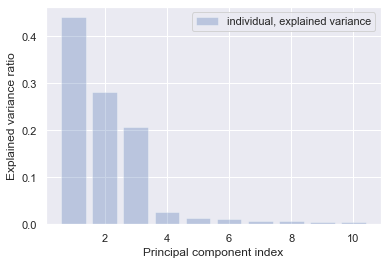

In [13]:
# Sorts the Eigenvalues from large to small
var_exp = [(i / sum(EVal)) for i in sorted(EVal, reverse=True)]

# Plot explained variances
plt.bar(range(1,11), var_exp, alpha=0.3, 
        align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(EVal[i]), EVec[:, i]) for i in range(len(EVal))]

# Sort the (EVal, EVec) tuples from high to low (reverse), key=EV
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))

X_train_pca = X_train_std.dot(w)



## Question 2 Task 1

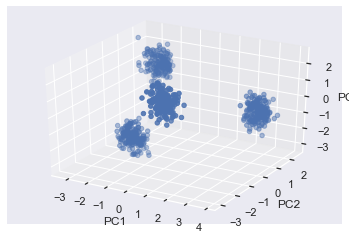

In [14]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
pca1 = [item[0] for item in X_train_pca]
pca2 = [item[1] for item in X_train_pca]
pca3 = [item[2] for item in X_train_pca]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(pca1, pca2, pca3)
plt.show()

In [18]:
# Set up PCA and logistic regression model
pca = PCA(n_components=3)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=2) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# solves task, given 3 classes (as from y_train) 
lr.fit(X_train_pca, y_train) 

LogisticRegression(multi_class='ovr', solver='liblinear')

## Question 2 Task 2